In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import Precision, Recall


## Load Dataset

In [2]:
data = load_breast_cancer()

## Convert to DataFrame

In [3]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.tail(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


## Checking Datatypes

In [5]:
df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [6]:
df.shape

(569, 31)

## Data Visualizations

    1️⃣ Check class balance

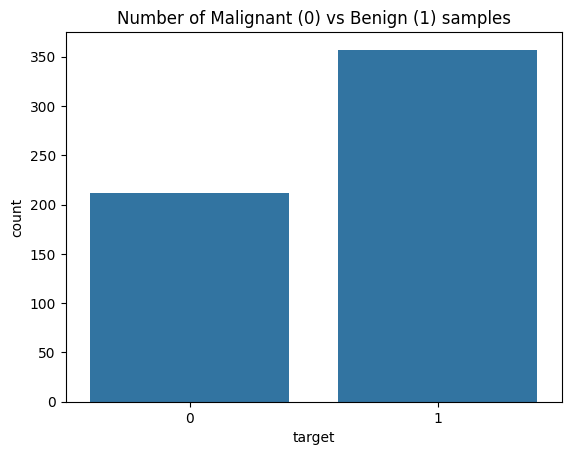

In [7]:
sns.countplot(x='target', data=df)
plt.title('Number of Malignant (0) vs Benign (1) samples')
plt.show()


    2️⃣ Feature distributions

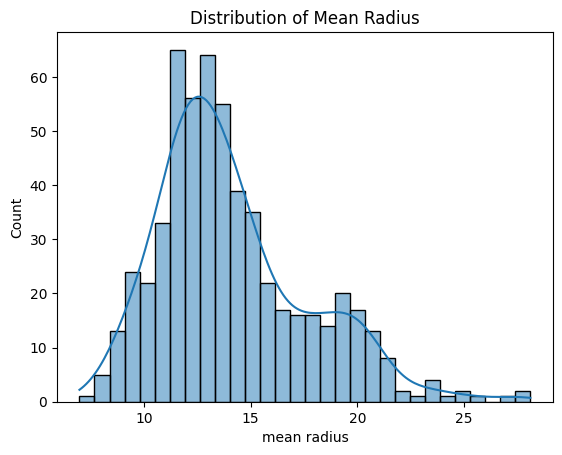

In [8]:

sns.histplot(df['mean radius'], kde=True, bins=30)
plt.title('Distribution of Mean Radius')
plt.show()


    3️⃣ Boxplots by target

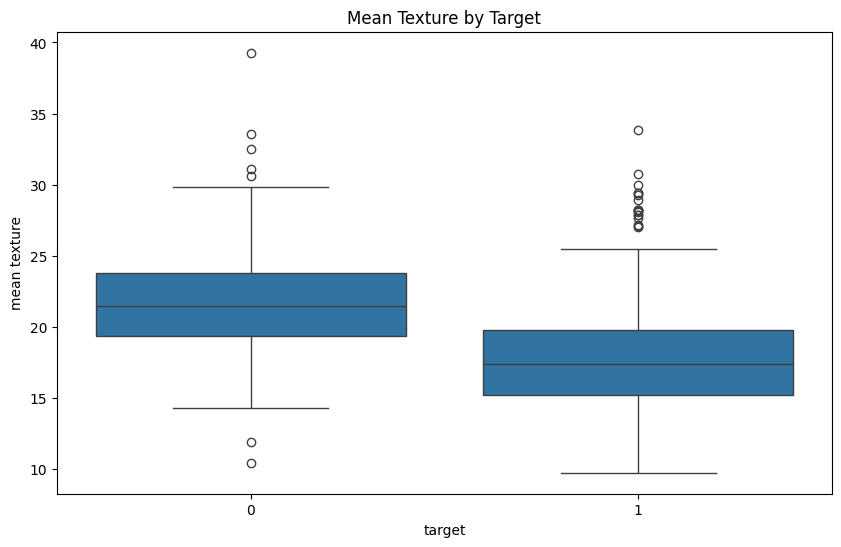

In [9]:
plt.figure(figsize=(10,6))
sns.boxplot(x='target', y='mean texture', data=df)
plt.title('Mean Texture by Target')
plt.show()


    4️⃣ Correlation heatmap

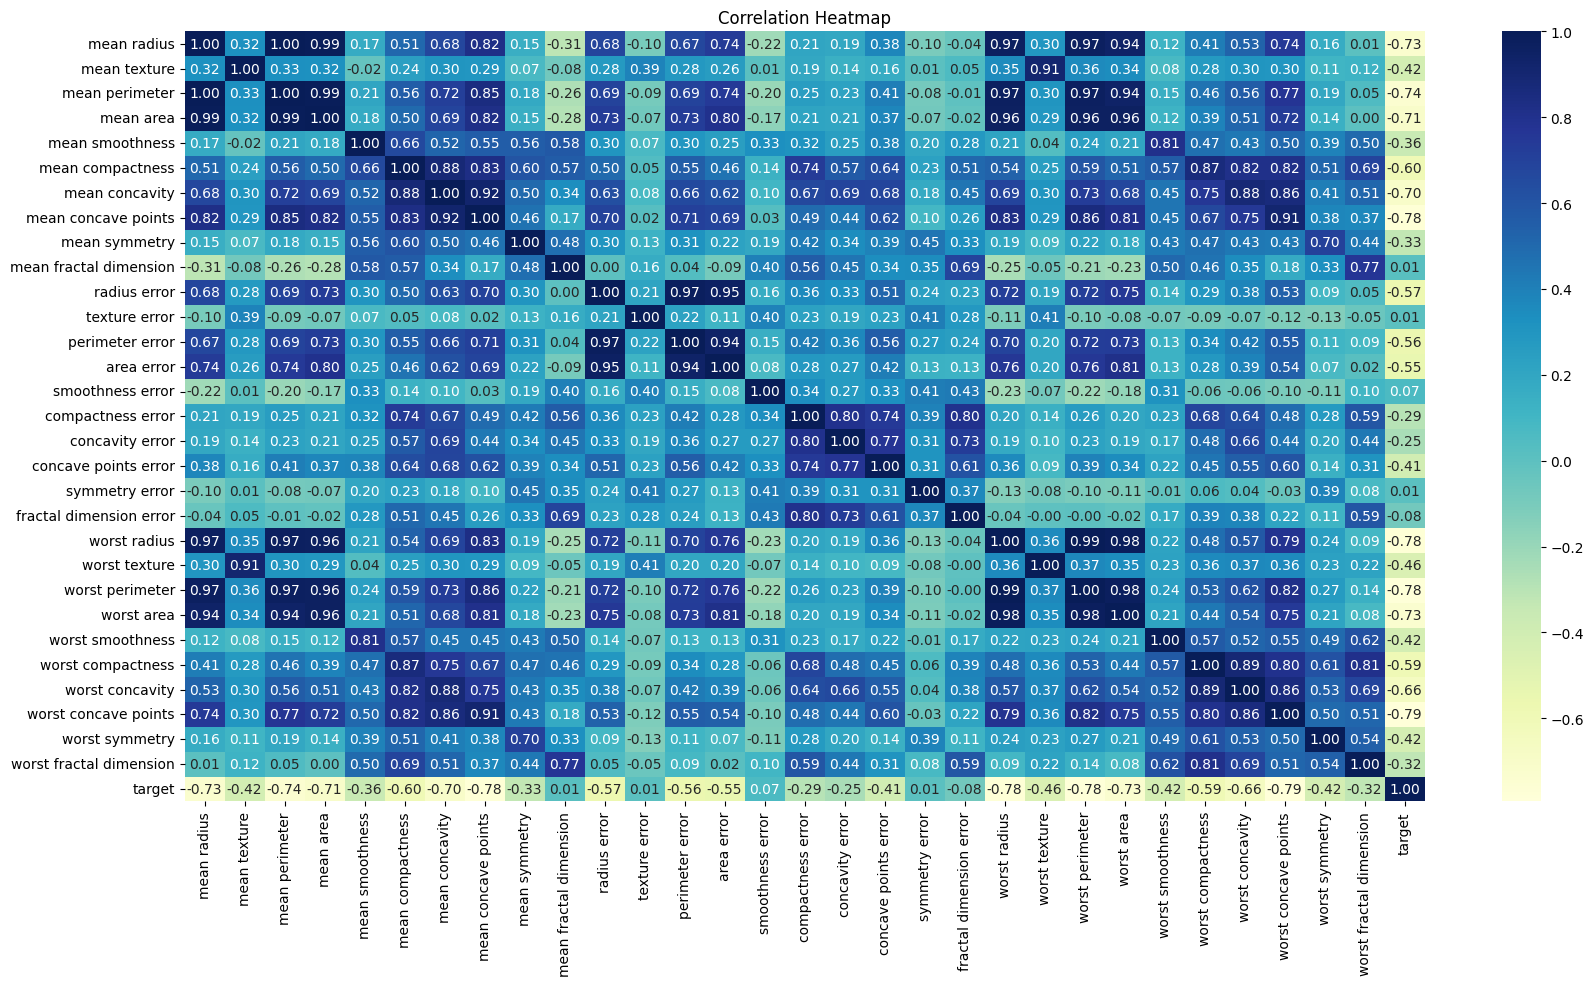

In [10]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Correlation Heatmap')
plt.show()


    5️⃣ Pairplot of selected features

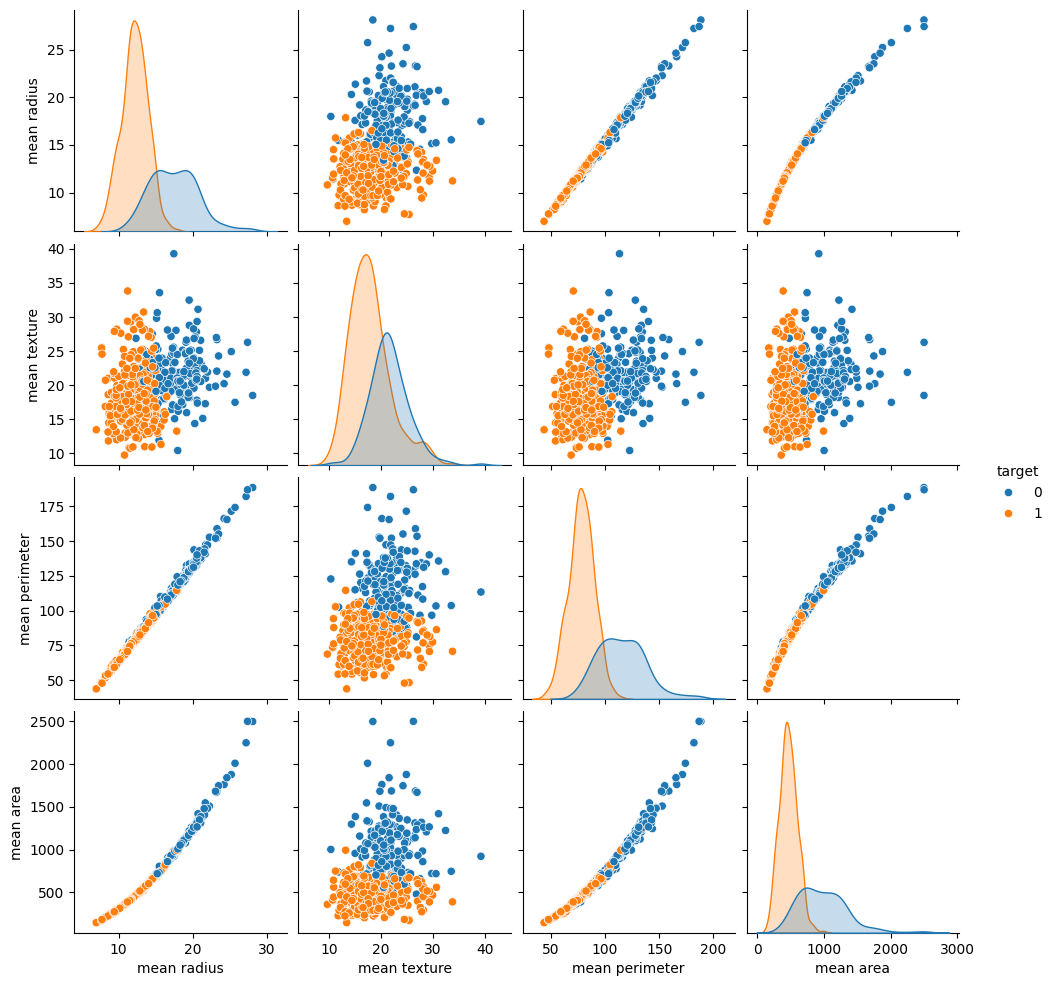

In [11]:
selected_features = ['mean radius','mean texture','mean perimeter','mean area','target']
sns.pairplot(df[selected_features], hue='target', diag_kind='kde')
plt.show()


## Splitting Dataset into Inputs and Outputs for Model Training

In [12]:
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

## Train-Test Split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature Scaling

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
print(np.mean(X_train, axis=0))   

[-1.82418183e-15 -3.36348775e-15 -3.60078268e-15 -2.62793450e-16
 -4.26667249e-15  1.00334881e-15  9.78216287e-16  5.78047988e-16
 -5.91846474e-15 -3.34799343e-15  8.53529701e-16 -7.47387500e-16
  7.52023596e-16  1.56163239e-17 -1.45012207e-15 -2.40149780e-15
  2.34732868e-16  3.27942801e-16 -3.14058913e-15  5.05090475e-16
  1.38741277e-15 -8.83298318e-17 -8.64509929e-16 -2.01596981e-15
  1.19318475e-15 -5.90492246e-16 -5.97568393e-16  1.08338247e-16
  4.78859931e-16 -2.32854029e-15]


In [16]:
print(np.std(X_train, axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


## Save the scaler for future use

In [17]:
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

## Build ANN Model

In [18]:
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', Precision(name='precision'), Recall(name='recall')])
model.summary()

c:\Users\vishm\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

## Train the Model

In [19]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7335 - loss: 0.5664 - precision: 0.7298 - recall: 0.9123 - val_accuracy: 0.8022 - val_loss: 0.4351 - val_precision: 0.7703 - val_recall: 0.9828
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8214 - loss: 0.4130 - precision: 0.8075 - recall: 0.9386 - val_accuracy: 0.8791 - val_loss: 0.3366 - val_precision: 0.8507 - val_recall: 0.9828
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8791 - loss: 0.3255 - precision: 0.8651 - recall: 0.9561 - val_accuracy: 0.9011 - val_loss: 0.2816 - val_precision: 0.8657 - val_recall: 1.0000
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9066 - loss: 0.2667 - precision: 0.8975 - recall: 0.9605 - val_accuracy: 0.9121 - val_loss: 0.2356 - val_precision: 0.8788 - val_recall: 1.0000
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9231 - loss: 0.2215 - precision: 0.9237 - recall: 0.9561 - val_accuracy: 0.9231 - val_loss: 0.2032 - 

## Evaluate the Model

In [20]:
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(X_test, y_test)

print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)




4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9649 - loss: 0.0722 - precision: 0.9718 - recall: 0.9718 
Test Accuracy: 0.9649122953414917
Test Precision: 0.9718309640884399
Test Recall: 0.9718309640884399


## Plot Training History

    📌 Plot Accuracy

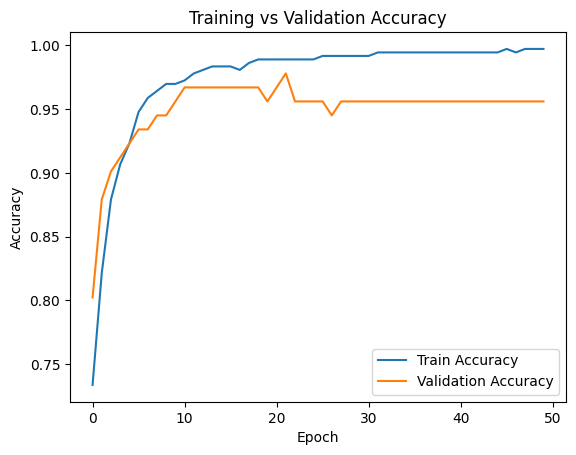

In [21]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

    📌 Plot Precision

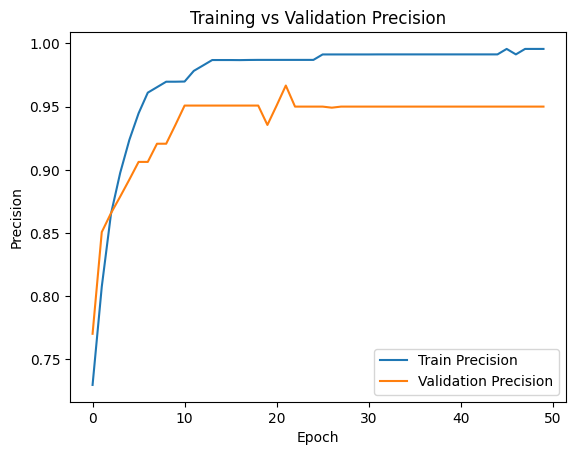

In [22]:
plt.plot(history.history['precision'], label='Train Precision')
plt.plot(history.history['val_precision'], label='Validation Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.title('Training vs Validation Precision')
plt.legend()
plt.show()


    📌 Plot Recall

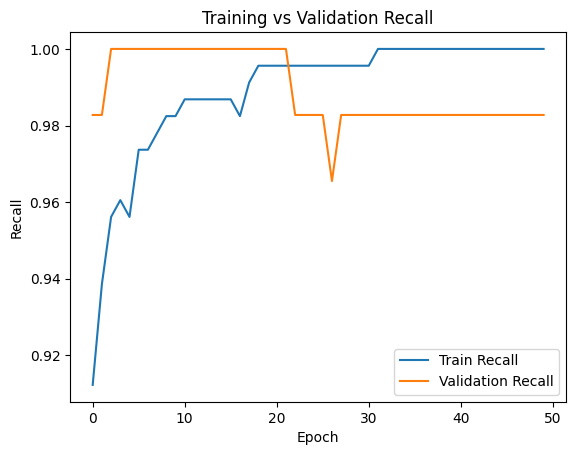

In [23]:
plt.plot(history.history['recall'], label='Train Recall')
plt.plot(history.history['val_recall'], label='Validation Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.title('Training vs Validation Recall')
plt.legend()
plt.show()


## Save the Model

In [24]:
model.save('breast_cancer_model.h5')

In [25]:
model.save('breast_cancer_model.keras')

## Prediction Function for New Data

    single prediction

In [26]:
def predict_tumor(new_data):
    scaler = joblib.load('scaler.joblib')
    model = tf.keras.models.load_model('breast_cancer_model.h5')
    
    new_scaled = scaler.transform(np.array(new_data).reshape(1, -1))
    pred = model.predict(new_scaled)[0][0]
    return "Benign" if pred > 0.5 else "Malignant"


patient1 = X_test[0]  
result = predict_tumor(patient1)
print("Prediction for  patient:", result)

c:\Users\vishm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Prediction for  patient: Malignant


     Batch Prediction from CSV

In [27]:
def batch_predict(csv_file):
    data = pd.read_csv(csv_file)
    scaler = joblib.load('scaler.joblib')
    model = tf.keras.models.load_model('breast_cancer_model.h5')
    
    data_scaled = scaler.transform(data)
    predictions = model.predict(data_scaled)
    labels = ['Benign' if p > 0.5 else 'Malignant' for p in predictions]
    return labels



predictions = batch_predict('new_patients.csv')
for i, label in enumerate(predictions):
    print(f"Patient {i+1}: {label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Patient 1: Malignant
Patient 2: Malignant
Patient 3: Malignant
Patient 4: Benign
Patient 5: Malignant
